In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# add the path to the src directory
import sys
sys.path.append('../src')
from data_loader import load_assets
from utils import detect_outliers

In [2]:
# Load all assets
data = load_assets()
tsla = data['TSLA']
bnd = data['BND']
spy = data['SPY']

c:\ME\KAIM\week11\time-series-portfolio-optimization\notebooks\../src\data_loader.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
c:\ME\KAIM\week11\time-series-portfolio-optimization\notebooks\../src\data_loader.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
c:\ME\KAIM\week11\time-series-portfolio-optimization\notebooks\../src\data_loader.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


# Exploratory Data Analysis

## TSLA

In [3]:
tsla.head()

Price,Date,Close,High,Low,Open,Volume,Ticker
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,
0,2015-07-01,17.943333,18.174667,17.856667,18.073999,31518000,TSLA
1,2015-07-02,18.667999,18.830000,18.220667,18.680000,107458500,TSLA
2,2015-07-06,18.648001,18.779333,18.420000,18.591999,61828500,TSLA
3,2015-07-07,17.858667,18.346666,17.384666,18.333332,91576500,TSLA
4,2015-07-08,16.997334,17.386667,16.954000,17.288000,93316500,TSLA


In [4]:
# check for missing values of tsla
tsla.isnull().sum()

Price   Ticker
Date              0
Close   TSLA      0
High    TSLA      0
Low     TSLA      0
Open    TSLA      0
Volume  TSLA      0
Ticker            0
dtype: int64

In [5]:
# check duplicates in tsla
tsla.duplicated().sum()

np.int64(0)

In [6]:
# check summary statistics of tsla
tsla.describe()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
count,2535,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03
mean,2020-07-12 16:49:59.289940992,131.963002,134.960429,128.837831,132.000600,1.141789e+08
min,2015-07-01 00:00:00,9.578000,10.331333,9.403333,9.488000,1.062000e+07
25%,2018-01-04 12:00:00,18.967667,19.279667,18.575334,18.901000,6.908220e+07
50%,2020-07-14 00:00:00,94.571335,97.666664,91.734001,94.400665,9.537450e+07
75%,2023-01-18 12:00:00,236.761665,240.881668,232.170006,235.851669,1.322551e+08
max,2025-07-30 00:00:00,479.859985,488.540009,457.510010,475.899994,9.140820e+08
std,NaN,120.914904,123.783736,117.996631,121.034152,7.332146e+07


In [7]:
# Convert Date to datetime and set as index:
tsla['Date'] = pd.to_datetime(tsla['Date'])
tsla = tsla.set_index('Date')

In [8]:
# Daily Returns & Rolling Volatility
tsla['Daily Return'] = tsla['Close'].pct_change()
tsla['Rolling Volatility'] = tsla['Daily Return'].rolling(window=30).std()
tsla.head()

Price,Close,High,Low,Open,Volume,Ticker,Daily Return,Rolling Volatility
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,,,
Date,,,,,,,,
2015-07-01,17.943333,18.174667,17.856667,18.073999,31518000,TSLA,NaN,NaN
2015-07-02,18.667999,18.830000,18.220667,18.680000,107458500,TSLA,0.040386,NaN
2015-07-06,18.648001,18.779333,18.420000,18.591999,61828500,TSLA,-0.001071,NaN
2015-07-07,17.858667,18.346666,17.384666,18.333332,91576500,TSLA,-0.042328,NaN
2015-07-08,16.997334,17.386667,16.954000,17.288000,93316500,TSLA,-0.048231,NaN


##### Outlier Detection in Daily Returns

In [9]:
tsla_outliers = detect_outliers(tsla, 'TSLA')


Outliers for TSLA:
Price      Daily Return
Ticker                 
Date                   
2020-09-08    -0.210628
2020-03-16    -0.185778
2020-02-05    -0.171758
2020-03-18    -0.160344
2025-03-10    -0.154262
...                 ...
2020-03-19     0.183877
2021-03-09     0.196412
2020-02-03     0.198949
2024-10-24     0.219190
2025-04-09     0.226900

[128 rows x 1 columns]


Plot outliers

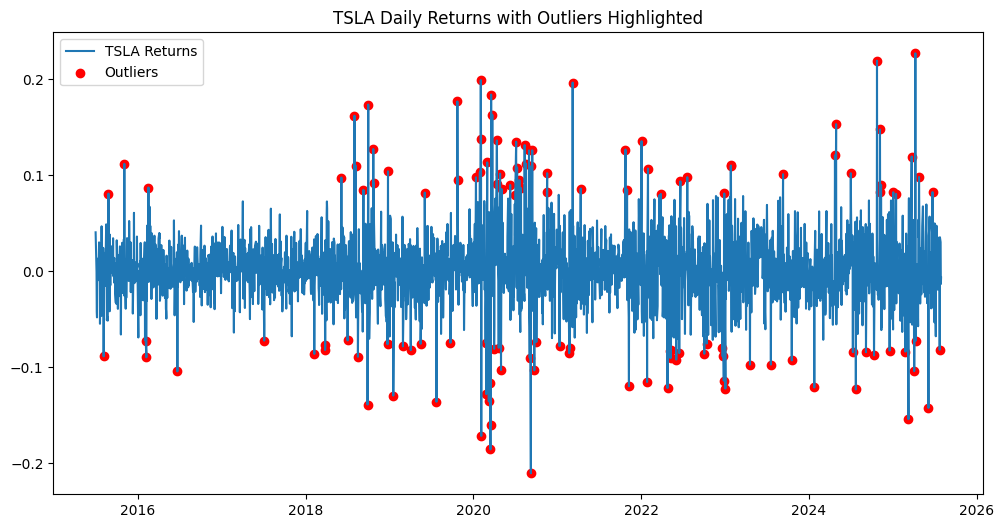

In [10]:
plt.figure(figsize=(12,6))
plt.plot(tsla['Daily Return'], label='TSLA Returns')
plt.scatter(tsla_outliers.index, tsla_outliers['Daily Return'], color='red', label='Outliers')
plt.legend()
plt.title('TSLA Daily Returns with Outliers Highlighted')
plt.show()


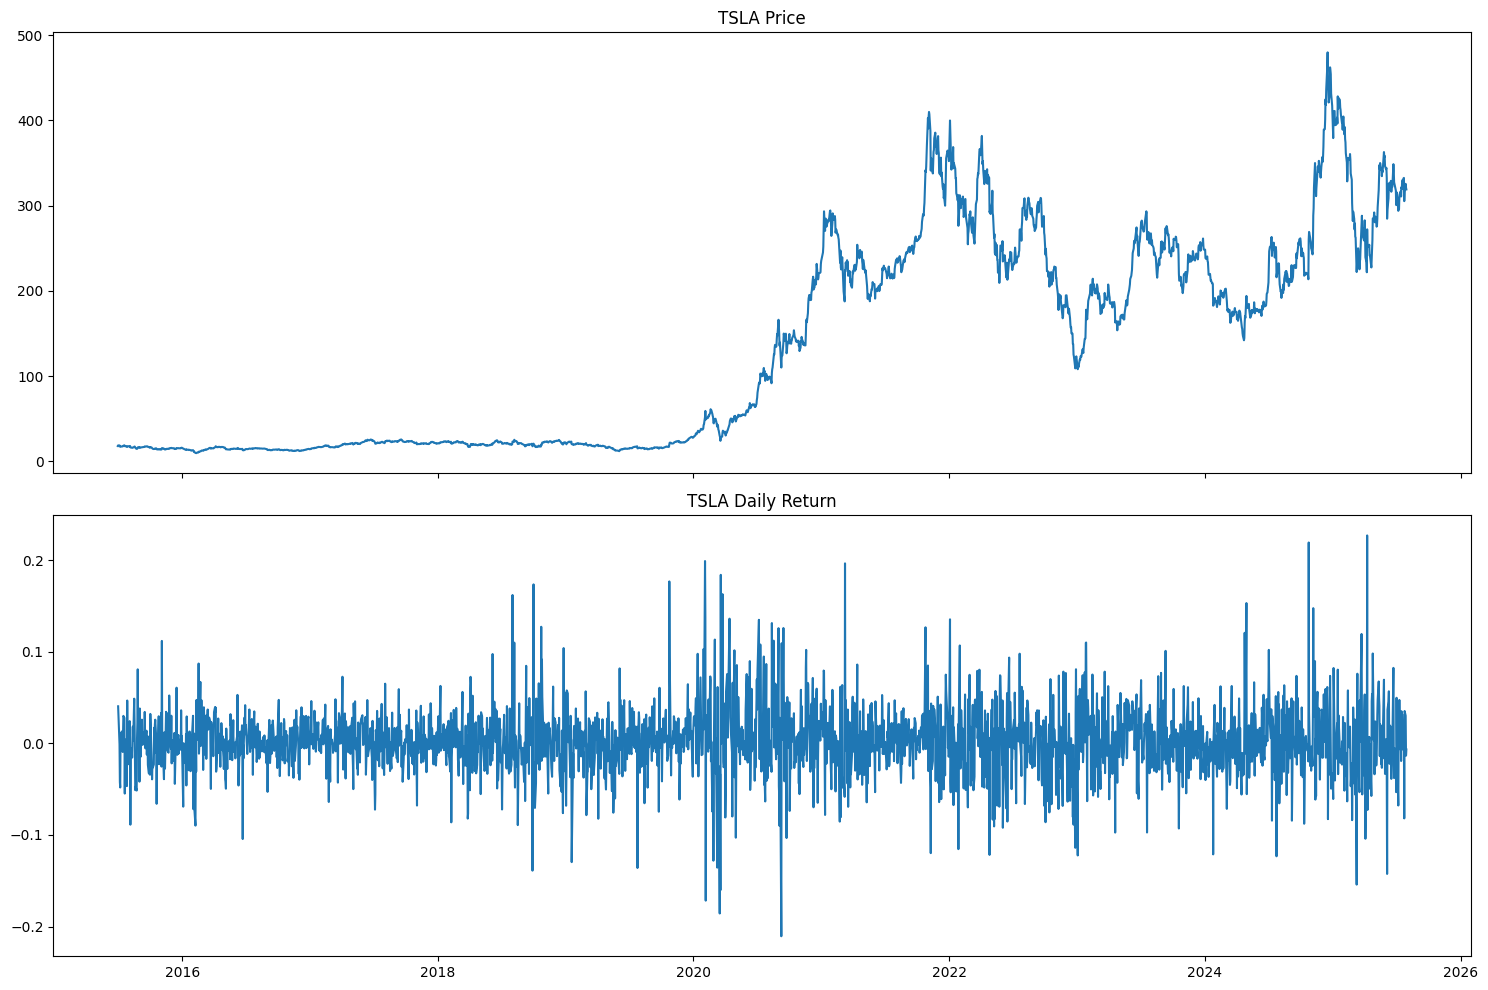

In [40]:
# Plot Price & Return
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
ax[0].plot(tsla['Close'])
ax[0].set_title('TSLA Price')
ax[1].plot(tsla['Daily Return'])
ax[1].set_title('TSLA Daily Return')
plt.tight_layout()
plt.show()

#### 🔹 ADF Test for Stationarity

In [33]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(tsla['Close'].dropna())
print(f"TSLA ADF Statistic: {result[0]}, p-value: {result[1]}")


TSLA ADF Statistic: -1.4188720053968262, p-value: 0.5731959514207228


📊 Interpretation
ADF Statistic: -1.42 (not very negative)

p-value: 0.573 (> 0.05)
✅ Conclusion → Fail to reject null hypothesis → TSLA price series is non-stationary.

##### difference TSLA’s series before ARIMA modeling

In [38]:
tsla['Differenced Close'] = tsla['Close'].diff()
tsla_diff = tsla['Differenced Close'].dropna()
result_diff = adfuller(tsla_diff)
print(f"TSLA Differenced ADF Statistic: {result_diff[0]}, p-value: {result_diff[1]}")

TSLA Differenced ADF Statistic: -9.107279016519296, p-value: 3.4751224114929933e-15


📊 Interpretation
ADF Statistic: -9.11 (very negative)

p-value: ~3.47e-15 (≪ 0.05)
✅ Conclusion → The differenced series is stationary and ready for ARIMA/SARIMA modeling.


#### 🔹 Risk Metrics: Sharpe Ratio, VaR

In [ ]:
risk_free_rate = 0.02/252  # daily risk-free rate
sharpe_ratio = (tsla['Daily Return'].mean() - risk_free_rate) / tsla['Daily Return'].std()
var_95 = tsla['Daily Return'].quantile(0.05)
print(f"BND: Sharpe Ratio = {sharpe_ratio:.2f}, VaR (95%) = {var_95:.4f}")

## BND

In [11]:
bnd.head()

Price,Date,Close,High,Low,Open,Volume,Ticker
Ticker,,BND,BND,BND,BND,BND,
0,2015-07-01,60.816761,60.914487,60.764139,60.794209,5399300,BND
1,2015-07-02,60.967102,61.027244,60.937031,60.937031,1060100,BND
2,2015-07-06,61.177559,61.222668,61.057282,61.222668,2210700,BND
3,2015-07-07,61.237682,61.470723,61.237682,61.410588,4183200,BND
4,2015-07-08,61.410599,61.463221,61.312867,61.373009,1967800,BND


In [12]:
# check for missing values of bnd
bnd.isnull().sum()

Price   Ticker
Date              0
Close   BND       0
High    BND       0
Low     BND       0
Open    BND       0
Volume  BND       0
Ticker            0
dtype: int64

In [13]:
# check for duplicate values in bnd
bnd.duplicated().sum()

np.int64(0)

In [14]:
# check summary statistics of bnd
bnd.describe()

Price,Date,Close,High,Low,Open,Volume
Ticker,,BND,BND,BND,BND,BND
count,2535,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03
mean,2020-07-12 16:49:59.289940992,68.469190,68.571175,68.364921,68.471393,4.434376e+06
min,2015-07-01 00:00:00,60.779156,60.899439,60.764139,60.786675,0.000000e+00
25%,2018-01-04 12:00:00,64.654346,64.731227,64.570641,64.660611,2.182050e+06
50%,2020-07-14 00:00:00,67.604851,67.749345,67.474057,67.589066,4.121100e+06
75%,2023-01-18 12:00:00,71.891144,72.018943,71.780688,71.886204,5.890100e+06
max,2025-07-30 00:00:00,77.318306,77.413291,77.283742,77.378734,3.396300e+07
std,NaN,4.554601,4.563589,4.544723,4.555993,2.899511e+06


In [15]:
# Convert Date to datetime and set as index:
bnd['Date'] = pd.to_datetime(bnd['Date'])
bnd = bnd.set_index('Date')

In [16]:
# Daily Returns & Rolling Volatility
bnd['Daily Return'] = bnd['Close'].pct_change()
bnd['Rolling Volatility'] = bnd['Daily Return'].rolling(window=30).std()
bnd.head()

Price,Close,High,Low,Open,Volume,Ticker,Daily Return,Rolling Volatility
Ticker,BND,BND,BND,BND,BND,,,
Date,,,,,,,,
2015-07-01,60.816761,60.914487,60.764139,60.794209,5399300,BND,NaN,NaN
2015-07-02,60.967102,61.027244,60.937031,60.937031,1060100,BND,0.002472,NaN
2015-07-06,61.177559,61.222668,61.057282,61.222668,2210700,BND,0.003452,NaN
2015-07-07,61.237682,61.470723,61.237682,61.410588,4183200,BND,0.000983,NaN
2015-07-08,61.410599,61.463221,61.312867,61.373009,1967800,BND,0.002824,NaN


##### Outlier Detection in Daily Returns


Outliers for BND:
Price      Daily Return
Ticker                 
Date                   
2020-03-12    -0.054384
2020-03-18    -0.024140
2020-03-17    -0.020686
2020-03-11    -0.018940
2022-06-13    -0.016153
...                 ...
2022-09-28     0.015544
2020-03-20     0.016955
2022-11-10     0.020702
2020-03-23     0.022149
2020-03-13     0.042200

[128 rows x 1 columns]


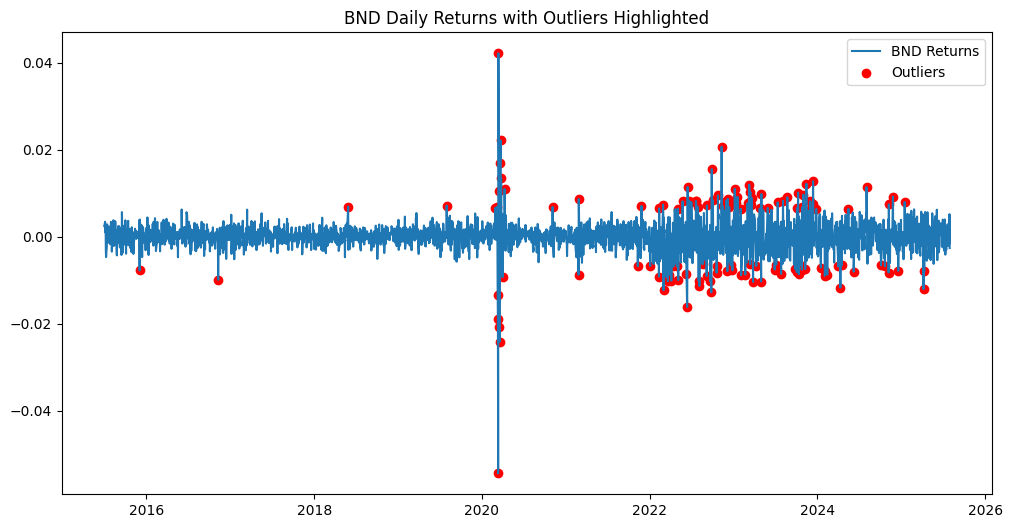

In [17]:
bnd_outliers = detect_outliers(bnd, 'BND')
plt.figure(figsize=(12,6))
plt.plot(bnd['Daily Return'], label='BND Returns')
plt.scatter(bnd_outliers.index, bnd_outliers['Daily Return'], color='red', label='Outliers')
plt.legend()
plt.title('BND Daily Returns with Outliers Highlighted')
plt.show()

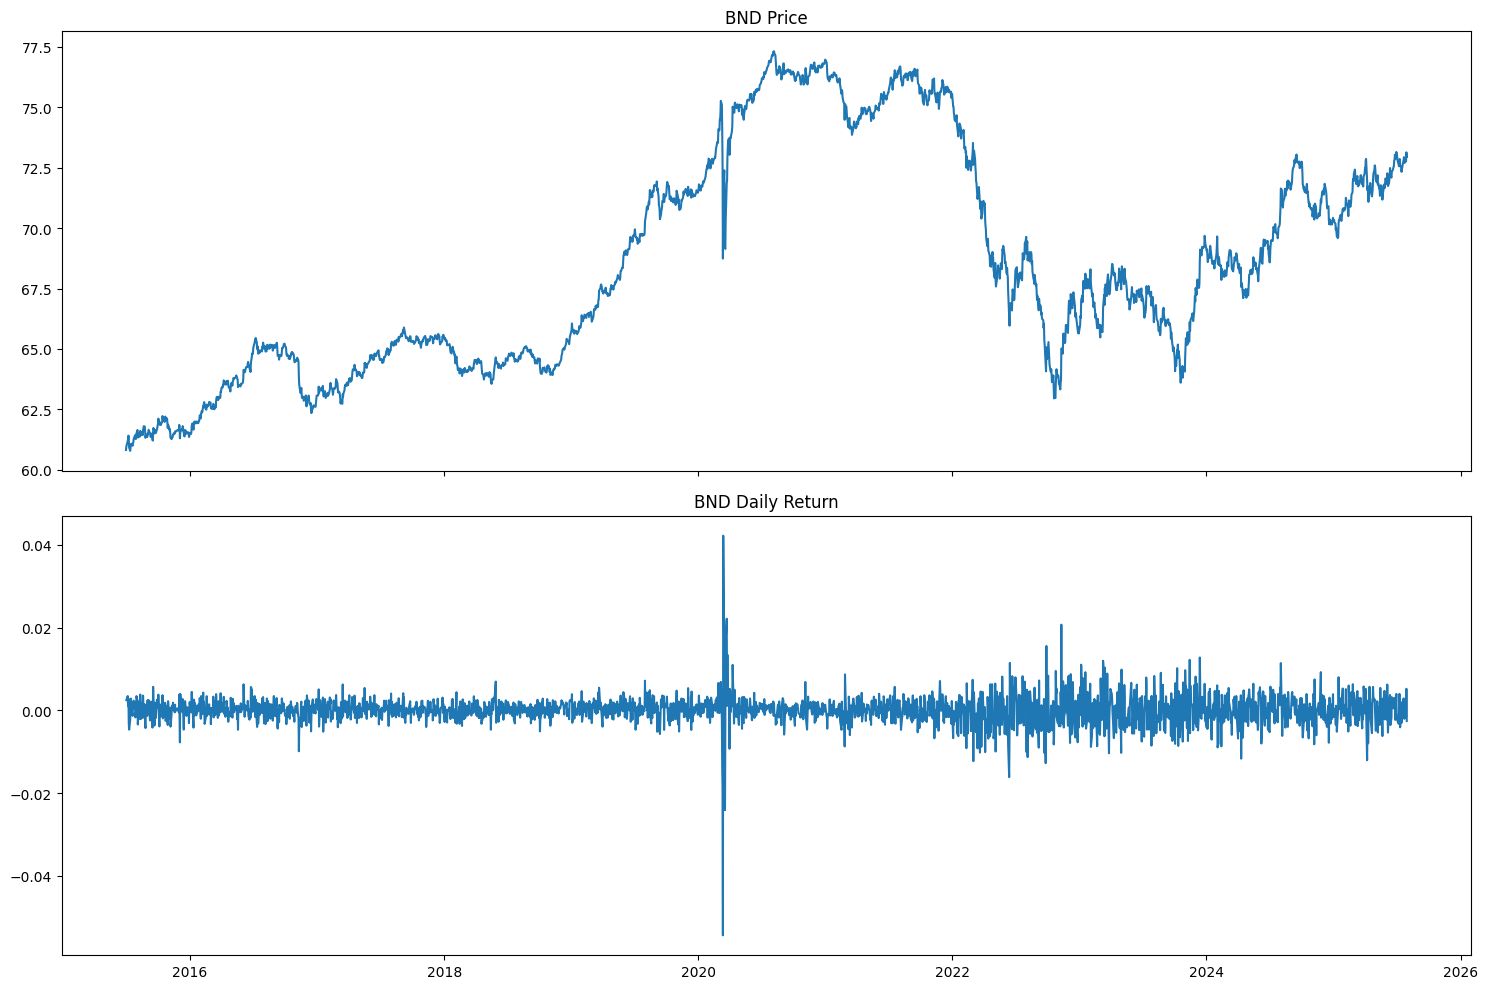

In [28]:
# Plot Price & Return
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
ax[0].plot(bnd['Close'])
ax[0].set_title('BND Price')
ax[1].plot(bnd['Daily Return'])
ax[1].set_title('BND Daily Return')
plt.tight_layout()
plt.show()

#### 🔹 ADF Test for Stationarity

In [34]:
result = adfuller(bnd['Close'].dropna())
print(f"BND ADF Statistic: {result[0]}, p-value: {result[1]}")

BND ADF Statistic: -1.5362469461343897, p-value: 0.5155104175269873


#### 🔹 Risk Metrics: Sharpe Ratio, VaR

In [36]:
risk_free_rate = 0.02/252  # daily risk-free rate
sharpe_ratio = (bnd['Daily Return'].mean() - risk_free_rate) / tsla['Daily Return'].std()
var_95 = bnd['Daily Return'].quantile(0.05)
print(f"BND: Sharpe Ratio = {sharpe_ratio:.2f}, VaR (95%) = {var_95:.4f}")

BND: Sharpe Ratio = -0.00, VaR (95%) = -0.0049



---

#### 📊 Interpreting the Output for BND

> **Sharpe Ratio = -0.00**

* A Sharpe Ratio close to **0** implies that the return barely exceeds the risk-free rate — or doesn't exceed it at all.
* **Negative Sharpe Ratio** usually means you're taking on risk **without** being compensated by higher return — not good for investors.
* But for **BND**, which is a **bond ETF**, this is not surprising:

  * It’s designed for **stability**, not high returns.

---

> **VaR (95%) = -0.0049**

* This means that on 95% of trading days, the **loss won’t exceed 0.49%**.
* In other words, there's a 5% chance you’ll lose **more than 0.49%** in one day — relatively low risk.

---

### ✅ This aligns with BND's nature:

* **Low risk**, **low volatility**
* **Minimal reward**, but offers stability for the portfolio

---


## SPY

In [18]:
spy.head()

Price,Date,Close,High,Low,Open,Volume,Ticker
Ticker,,SPY,SPY,SPY,SPY,SPY,
0,2015-07-01,174.917130,175.363905,174.124732,175.111010,135979900,SPY
1,2015-07-02,174.756943,175.566203,174.335456,175.397611,104373700,SPY
2,2015-07-06,174.259644,175.043603,173.256502,173.458821,117975400,SPY
3,2015-07-07,175.355423,175.481864,172.059392,174.461873,173820200,SPY
4,2015-07-08,172.413467,174.293296,172.177436,174.006688,164020100,SPY


In [19]:
# check for missing values of spy
spy.isnull().sum()

Price   Ticker
Date              0
Close   SPY       0
High    SPY       0
Low     SPY       0
Open    SPY       0
Volume  SPY       0
Ticker            0
dtype: int64

In [20]:
# check duplicates in spy
spy.duplicated().sum()

np.int64(0)

In [21]:
# check summary statistics of spy
spy.describe()

Price,Date,Close,High,Low,Open,Volume
Ticker,,SPY,SPY,SPY,SPY,SPY
count,2535,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03
mean,2020-07-12 16:49:59.289940992,334.193731,335.981617,332.114634,334.125536,8.503521e+07
min,2015-07-01 00:00:00,155.869766,156.926746,153.758455,155.426515,2.027000e+07
25%,2018-01-04 12:00:00,230.083191,234.024901,228.661719,231.007832,5.779150e+07
50%,2020-07-14 00:00:00,305.264435,306.143549,302.033069,304.714921,7.451530e+07
75%,2023-01-18 12:00:00,420.350479,423.114897,417.754486,420.117451,9.789180e+07
max,2025-07-30 00:00:00,637.099976,638.669983,635.539978,638.349976,5.072443e+08
std,NaN,126.427705,127.053090,125.661288,126.391139,4.428796e+07


In [22]:
# Convert Date to datetime and set as index:
spy['Date'] = pd.to_datetime(spy['Date'])
spy = spy.set_index('Date')

In [23]:
# Daily Returns & Rolling Volatility
spy['Daily Return'] = spy['Close'].pct_change()
spy['Rolling Volatility'] = spy['Daily Return'].rolling(window=30).std()
spy.head()

Price,Close,High,Low,Open,Volume,Ticker,Daily Return,Rolling Volatility
Ticker,SPY,SPY,SPY,SPY,SPY,,,
Date,,,,,,,,
2015-07-01,174.917130,175.363905,174.124732,175.111010,135979900,SPY,NaN,NaN
2015-07-02,174.756943,175.566203,174.335456,175.397611,104373700,SPY,-0.000916,NaN
2015-07-06,174.259644,175.043603,173.256502,173.458821,117975400,SPY,-0.002846,NaN
2015-07-07,175.355423,175.481864,172.059392,174.461873,173820200,SPY,0.006288,NaN
2015-07-08,172.413467,174.293296,172.177436,174.006688,164020100,SPY,-0.016777,NaN


##### Outlier Detection in Daily Returns


Outliers for SPY:
Price      Daily Return
Ticker                 
Date                   
2020-03-16    -0.109424
2020-03-12    -0.095677
2020-03-09    -0.078094
2025-04-04    -0.058543
2020-06-11    -0.057649
...                 ...
2020-03-26     0.058390
2020-04-06     0.067166
2020-03-13     0.085486
2020-03-24     0.090603
2025-04-09     0.105019

[128 rows x 1 columns]


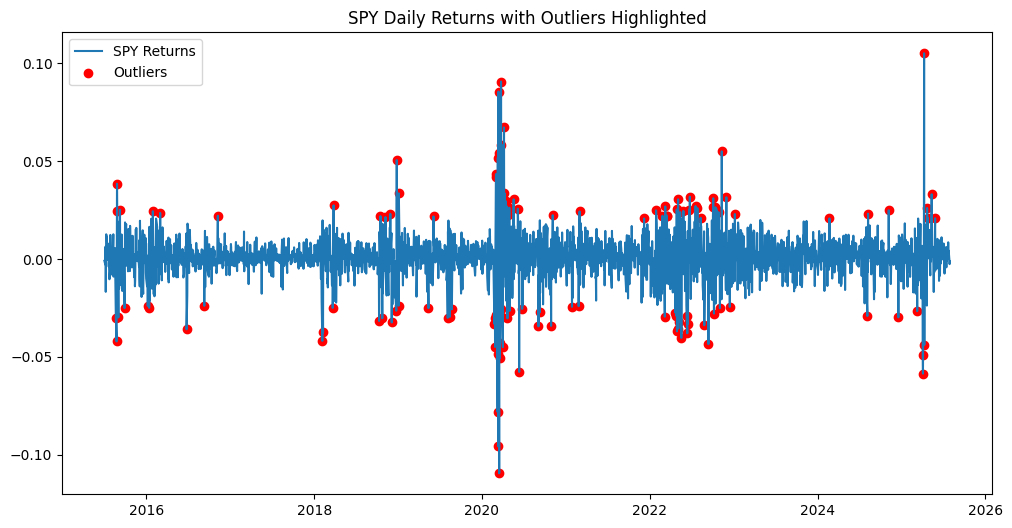

In [24]:
spy_outliers = detect_outliers(spy, 'SPY')
plt.figure(figsize=(12,6))
plt.plot(spy['Daily Return'], label='SPY Returns')
plt.scatter(spy_outliers.index, spy_outliers['Daily Return'], color='red',
                label='Outliers')
plt.legend()
plt.title('SPY Daily Returns with Outliers Highlighted')
plt.show()

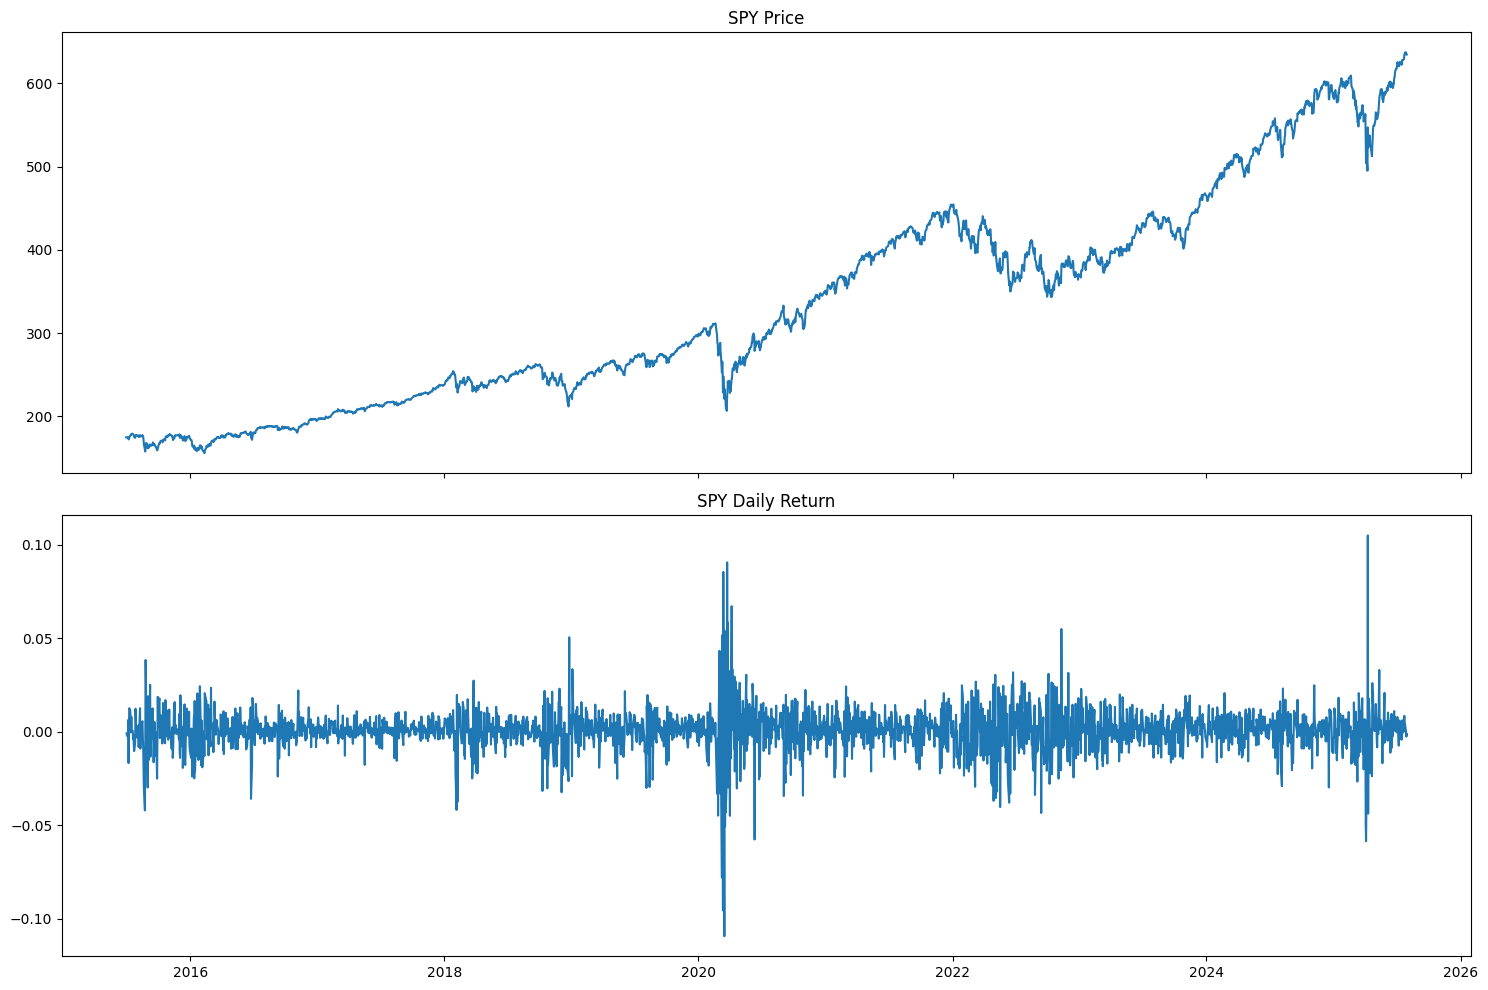

In [25]:
# Plot Price & Return
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
ax[0].plot(spy['Close'])
ax[0].set_title('SPY Price')
ax[1].plot(spy['Daily Return'])
ax[1].set_title('SPY Daily Return')
plt.tight_layout()
plt.show()

#### 🔹 ADF Test for Stationarity

In [35]:
result = adfuller(spy['Close'].dropna())
print(f"SPY ADF Statistic: {result[0]}, p-value: {result[1]}")

SPY ADF Statistic: 0.690813063393802, p-value: 0.989652734043377


🧪 Augmented Dickey-Fuller (ADF) Test Recap
The ADF test checks whether a time series is stationary.

Null hypothesis: The series has a unit root (i.e., not stationary).

If p-value < 0.05, we reject the null ⇒ the series is stationary.

If p-value ≥ 0.05, we fail to reject ⇒ the series is non-stationary.

🧾 Your Result for SPY:
ADF Statistic = 0.69

p-value = 0.989

✅ Interpretation:

SPY's adjusted close prices are non-stationary — strongly non-stationary in fact.

In [37]:
# Differencing for Stationarity
spy['Differenced Close'] = spy['Close'].diff()
spy_diff = spy['Differenced Close'].dropna()

# ADF test after differencing
result_diff = adfuller(spy_diff)
print(f"SPY Differenced ADF Statistic: {result_diff[0]}, p-value: {result_diff[1]}")

SPY Differenced ADF Statistic: -16.48674280023266, p-value: 2.2113690682169358e-29


📊 Interpretation of Differenced ADF Test for SPY
ADF Statistic: -16.49 (very negative)

p-value: ~0 (extremely small)

✅ Conclusion:

After differencing, SPY’s adjusted close series is now stationary, so it's suitable for ARIMA modeling.